# DECISION TREE CLASSIFIER ##
For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.


In [1]:
# Importing certain libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.datasets as datasets

## Understanding the data ##


In [2]:
# Importing the dataset
data = pd.read_csv(r"D:\TSF\Task 4\Iris.csv")

# Displaying the dataset
data.head(151)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# For calculating the ideal number of clusters, we will unique functions to classify the number of species present
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
# Gathering the basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Data types
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
# Checking for any null values or missing values
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

Since, there are no null or missing values present, therefore we can move further for data exploration

## Data Visualization ##

<Figure size 1440x720 with 0 Axes>

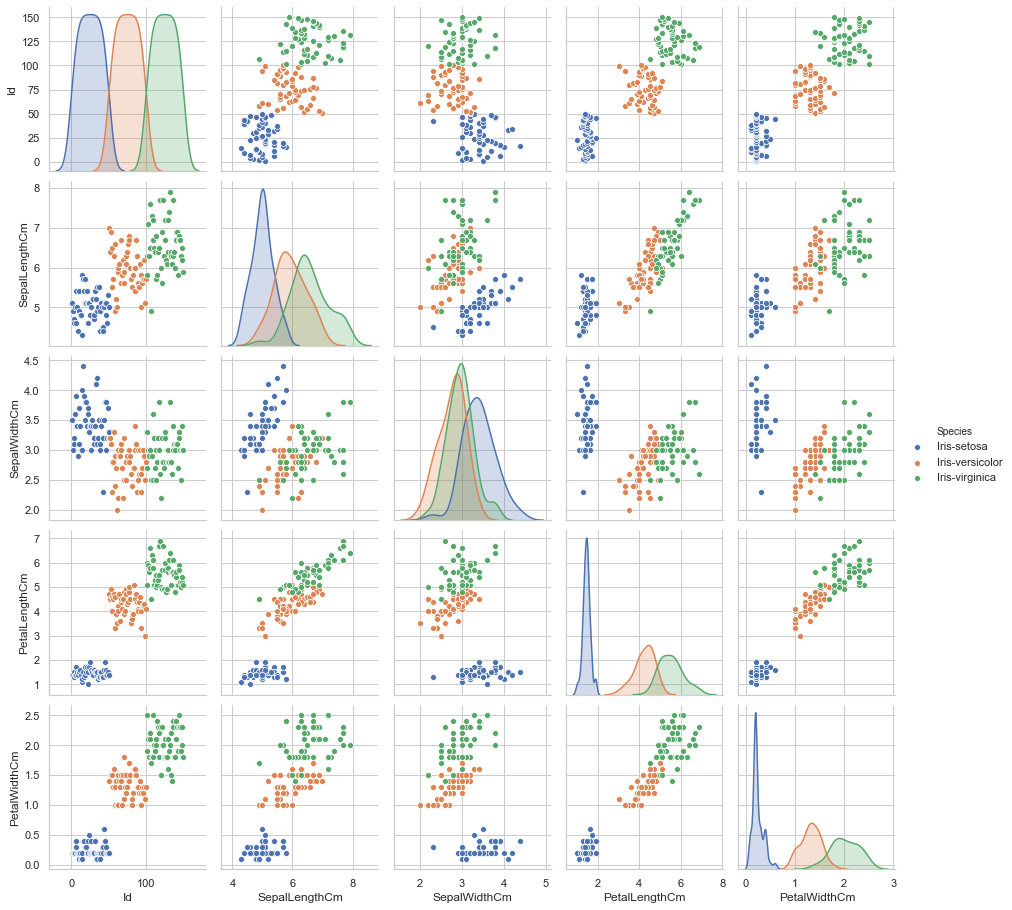

In [7]:
# First, using seaborn pairplot for data visualisation
sb.set(style = "whitegrid")
plt.figure(figsize = (20, 10))
sb.pairplot(data, hue = "Species")

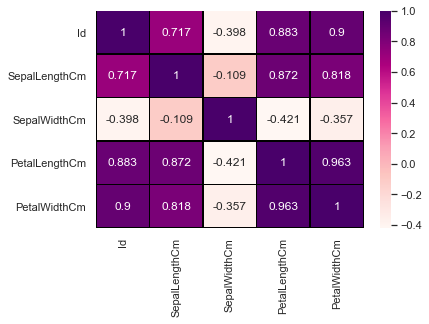

In [8]:
# Second, using seaborn heatmaps for data visualisation
sb.heatmap(data.corr(), annot = True, fmt = ".3g", linewidth = 0.5, linecolor = "Black", cmap = "RdPu")

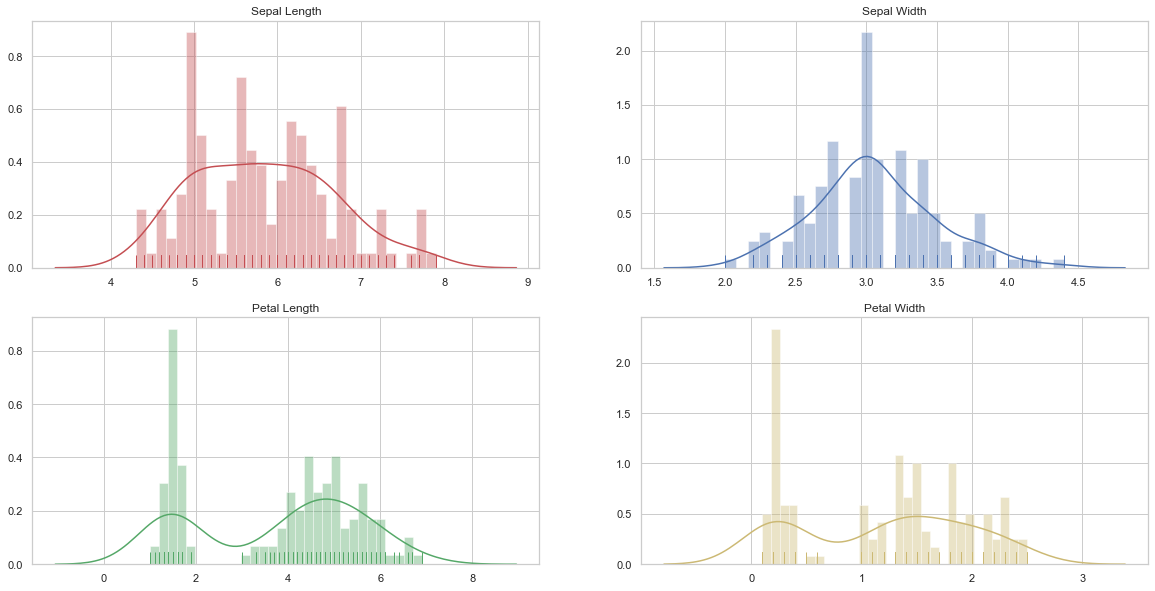

In [9]:
# Third, using seaborn subplots for data visualisation
plt.figure(figsize = (20, 10))
sb.set(style = "whitegrid")
plt.subplot(2, 2, 1)
sb.distplot(data['SepalLengthCm'].values, bins = 30, kde = True, rug = True, color = "r").set(title = "Sepal Length")
plt.subplot(2, 2, 2)
sb.distplot(data['SepalWidthCm'].values, bins = 30, kde = True, rug = True, color = "b").set(title = "Sepal Width")
plt.subplot(2, 2, 3)
sb.distplot(data['PetalLengthCm'].values, bins = 30, kde = True, rug = True, color = "g").set(title = "Petal Length")
plt.subplot(2, 2, 4)
sb.distplot(data['PetalWidthCm'].values, bins = 30, kde = True, rug = True, color = "y").set(title = "Petal Width")
plt.show()

## Data Preprocessing ##


In [10]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(X.shape)
print(y.shape)
print(data.shape)

(150, 5)
(150,)
(150, 6)


In [11]:
# Splitting up of data into training and test set   
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2, shuffle = True) 
# shuffling of data is a good habit for creating a ML model

In [12]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier()
dec.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Checking the accuracy of Decision Tree ##

In [13]:
# Importing the accuracy_score 
from sklearn.metrics import accuracy_score
pred = dec.predict(X_test)
print(f"Accuracy : {accuracy_score(pred, y_test)* 100}")

Accuracy : 96.66666666666667


Therefore, we got an immensely accurate Decision Tree scoring a 96.67 % of accuracy.

In [14]:
# Importing the classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



In this report, we can clearly see the accuracy through f1-score which is 97 % (approx.).  f1 - score = (2 * precision * recall / (precision + recall))

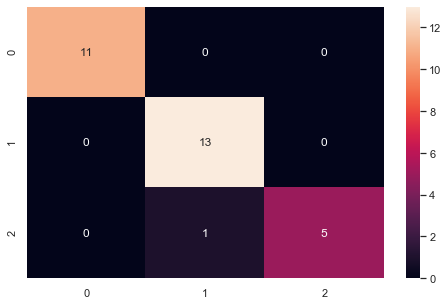

In [15]:
# Also, we can use seaborn confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 5))
sb.heatmap(confusion_matrix(y_test, pred), annot = True);

## Visualizing the Decision Tree ##

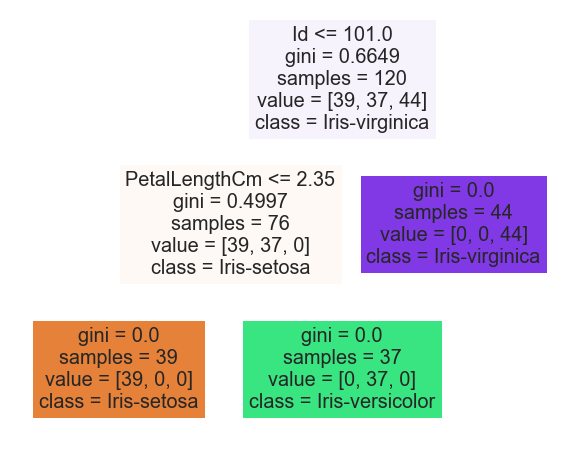

In [16]:
# Plotting Tree
from sklearn.tree import plot_tree

plt.figure(figsize = (10, 8))
tree = plot_tree(dec, feature_names = data.columns, class_names=data["Species"].unique().tolist(), precision = 4,
                 label = "all", filled = True)
plt.show()

# ASSIGNMENT COMPLETED #